In [1]:
import pandas as pd
import string as st

import matplotlib
import numpy as np
#from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# load dataset as pandas df
data_file = '../data/180213_cogsci_journal_unprocessed.csv'

df_pd = pd.read_csv(data_file)

# fix the article index column name
df_pd.rename(columns={"Unnamed: 0": "Article Index"}, inplace=True)

# NOTE:
# don't fill the column with garbage data, just remove it
#df_pd = df_pd.fillna("Other") 

# drop all rows where 'article_name' is nan
df_pd = df_pd.dropna(how='all', subset=['article_name'])
# need to realign indices to start at 0
df_pd.index=range(len(df_pd.index))

In [7]:
df_pd

,article_index,article_name,year,volume,issue,pages,month,doi,article_type,authors,...,references_journals,references_nonjournal,references_titles_all,references_same_number,references_titles_journal,citedby,num_of_citedby,citedby_authors,citedby_journals,article_abstract
0,2,Why Cognitive Science,1977.0,1.0,1,1-2,January,10.1207/s15516709cog0101_1,Original Article,Allan Collins,...,NaN,NaN,NaN,0.0,NaN,"Marco Elio Tabacchi, Settimo Termini, “The hum...",12.0,Marco Elio Tabacchi/nSettimo Termini/n2017/nLo...,Biophysical Chemistry/nJournal of the Associat...,NaN
1,3,"An Overview of KRL, a Knowledge Representation...",1977.0,1.0,1,3-46,January,10.1207/s15516709cog0101_2,Original Article,"Daniel G. Bobrow1,* and\nTerry Winograd2",...,Artificial Intelligence/nCommunication of the ...,Human associative memory/nRepresentation and u...,"Human associative memory/nGus, a frame driven ...",1.0,"Gus, a frame driven dialog system/nA model and...","Orlando Lopez-Cruz, Nini Johanna Garnica, Tren...",278.0,Orlando Lopez-Cruz/nNini Johanna Garnica/n2018...,Computational Linguistics/nExpert Systems with...,"This paper describes KRL, a Knowledge Represen..."
2,4,Human and Computational Question Answering†,1977.0,1.0,1,47-73,January,10.1207/s15516709cog0101_3,Original Article,Wendy Lehnert*,...,American Journal of Computational Linguistics/...,Representation and understanding/nCenter for H...,Concepts for representing mundane reality in p...,0.0,An approach to the representation of mundane w...,"Colleen E. Crangle, Joyce Brothers Kart, A que...",31.0,Colleen E. Crangle/nJoyce Brothers Kart/n2015/...,PeerJ/nTheory and Practice in Language Studies...,The ability to answer questions about a text i...
3,5,Definite Descriptions and Semantic Memory†,1977.0,1.0,1,74-83,January,10.1207/s15516709cog0101_4,Original Article,Andrew Ortony* and\nRichard C. Anderson,...,Cognitive Psychology/nAmerican Educational Res...,Human associative memory/nTranslations from th...,Human associative memory/nIndividuation and re...,1.0,Individuation and reference in memory: Proper ...,"Kristine H. Onishi, Gregory L. Murphy, Discour...",7.0,Kristine H. Onishi/nGregory L. Murphy/n2002/nB...,Language and Cognitive Processes/nJournal of M...,Subjects were exposed to sentences containing ...
4,6,"Artificial Intelligence, Language, and the Stu...",1977.0,1.0,1,84-123,January,10.1207/s15516709cog0101_5,Original Article,Professor Ira Goldstein* and\nSeymour Papert,...,Linguistic Analysis/nArtificial Intelligence/n...,Human associative memory/nRepresentation and u...,Human associative memory/nProposal for knowled...,1.0,Questions of form and interpretation/nSummary ...,"Antoine C. M. van den Bogaart, Hans G. K. Humm...",37.0,Antoine C. M. van den Bogaart/nHans G. K. Humm...,Professional Development in Education/nArtific...,This paper studies the relationship of Artific...
5,7,Induction of Augmented Transition Networks†,1977.0,1.0,2,125-157,April,10.1207/s15516709cog0102_1,Original Article,John R. Anderson*,...,Information and Control/nJournal of Mathematic...,Language acquisition by computer and child/nIn...,Language acquisition by computer and child/nCo...,0.0,Language identification in the limit/nA mathem...,"Georgia M. Green, Non-Transformational Syntax,...",25.0,Georgia M. Green/n2011/nMichael Gasser/n2006/n...,Neural Networks/nLingua/nComputers & Industria...,LAS is a program that acquires augmented trans...
6,8,Decision Theory and Artificial Intelligence II...,1977.0,1.0,2,158-192,April,10.1207/s15516709cog0102_2,Original Article,"Jerome A. Feldman1,* and\nRobert F. Sproull2",...,Computing Surveys/nOperations Research/nArtifi...,Representation and understanding/nPhD thesis/n...,New programming languages for AI research/nAn ...,1.0,New programming languages for AI research/nSea...,"Nils Bulling, A Survey of Multi-Agent Decision...",24.0,Nils Bulling/n2014/nCharisma F. Choudhury/nMos...,KI - Künstliche Intelligenz/nJournal of Choice...,This paper describes a problem-solving frame

In [8]:
affiliations = df_pd["author_affiliations"].str.lower()
columns=['Neuro_Science','Psychology','Philosophy','Anthropology','Linguistics','Artificial Intelligence', 'CS', 'CogSci', 'Other', 'Missing', 'Total']
# hexaCount=pd.DataFrame(0, index=np.arange(len(affiliations)), columns=columns)


aff_df = df_pd["author_affiliations"].str.lower()
affiliations = affiliations.tolist()
#aff_df[]
#df_pd["author_affiliations"]
#print(type(hexaCount[1]))
#hexaCount

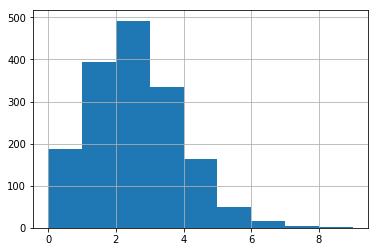

In [10]:
df_pd['num_of_authors'].hist(bins=range(10))

In [54]:
# df_departmentSplit = []
# numDepts = []

# for i in range(2,len(aff_df)):
#     if():
#         print(i)
#     temp = aff_df[i].split('\n')
#     df_departmentSplit.append(temp)
#     numDepts.append([i+1]* len(temp))
    
# finList = []

# for j in range(len(numDepts)):
#     for k in range(len (numDepts[j])):
#         finList.append(numDepts[j][k])
# finList

In [ ]:
# new function structure
# instead of defining all the ifs, we can do a for loop through the "filter_table"
# for each row in aff_df
#     do the search:
#     for each row in filter_table
#          YOU GUYS: FILL IN THE BLANK HERE
#          ideas: iterate through columns, OR do strcmp

In [12]:
# remember to also filter by article type

# function definition
def department_count (aff_df, columns):
    # needs two inputs: the affiliation list (aff_df), and column names (colums)
    
    # initialize empty hexacount df
    hexaCount=pd.DataFrame(0, index=np.arange(len(aff_df)), columns=columns)
    
    # loop through
    for i in range(len(aff_df)):
        # ideally, we want to also move this categories to an external datafile
        if pd.isnull(aff_df.iloc[i]):
            # checking if the affiliation is just empty
            hexaCount['Missing'].iloc[i] =1
        
        else:
            # not NaN, proceed to hexagonize
            if "anthropology" in aff_df.iloc[i]:
                hexaCount["Anthropology"].iloc[i] += 1

            if "artificial intelligence" in aff_df.iloc[i]:
                hexaCount["Artificial Intelligence"].iloc[i] += 1    

            if "linguistic" in aff_df.iloc[i]:
                hexaCount["Linguistics"].iloc[i] += 1

            if "neuro science" in aff_df.iloc[i] or "neuroscience" in aff_df.iloc[i]:
                hexaCount["Neuro_Science"].iloc[i] += 1

            if "philosophy" in aff_df.iloc[i]:
                hexaCount["Philosophy"].iloc[i] += 1

            if "psychology" in aff_df.iloc[i]:
                hexaCount["Psychology"].iloc[i] += 1
            
            if "computer" in aff_df.iloc[i]:
                hexaCount["CS"].iloc[i] += 1

            if "cognitive science" in aff_df.iloc[i]:
                hexaCount["CogSci"].iloc[i] += 1
                
            if hexaCount.iloc[i].sum()<1.:            
                hexaCount["Other"].iloc[i] = 1
    
            hexaCount["Total"].iloc[i] = hexaCount.iloc[i].sum()

    return hexaCount

In [13]:
# building the hexagon
hexaCount = department_count(aff_df, columns)

### Check to see which affiliations got filed under which category

In [23]:
hexaCount.iloc[759]

Neuro_Science              0
Psychology                 1
Philosophy                 0
Anthropology               1
Linguistics                1
Artificial Intelligence    0
CS                         0
CogSci                     0
Other                      0
Missing                    0
Total                      3
Name: 759, dtype: int64

In [24]:
pd.options.display.max_colwidth = 200
print(columns)
query_hex = columns[3]
cols_to_disp=['author_affiliations']
print('Querying:', query_hex, '\n---\n')
print(df_pd[cols_to_disp].loc[hexaCount[query_hex]==1].to_string())

['Neuro_Science', 'Psychology', 'Philosophy', 'Anthropology', 'Linguistics', 'Artificial Intelligence', 'CS', 'CogSci', 'Other', 'Missing', 'Total']
Querying: Anthropology 
---

                                                                                                                                                                                          author_affiliations
78                                                                                                                                            Department of Anthropology, University of California, San Diego
489                                                                                                                                                        Max Planck Institute for Evolutionary Anthropology
491                                                                                                                                                        Max-Planck-Institute for Evolutionary Anthropolog

### Append hexaCount to original dataframe

In [25]:
pd_concat = pd.concat([df_pd, hexaCount], axis=1)

In [26]:
pd_concat

,article_index,article_name,year,volume,issue,pages,month,doi,article_type,authors,...,Psychology,Philosophy,Anthropology,Linguistics,Artificial Intelligence,CS,CogSci,Other,Missing,Total
0,2,Why Cognitive Science,1977.0,1.0,1,1-2,January,10.1207/s15516709cog0101_1,Original Article,Allan Collins,...,0,0,0,0,0,0,0,0,1,0
1,3,"An Overview of KRL, a Knowledge Representation Language",1977.0,1.0,1,3-46,January,10.1207/s15516709cog0101_2,Original Article,"Daniel G. Bobrow1,* and\nTerry Winograd2",...,0,0,0,0,0,0,0,1,0,1
2,4,Human and Computational Question Answering†,1977.0,1.0,1,47-73,January,10.1207/s15516709cog0101_3,Original Article,Wendy Lehnert*,...,0,0,0,0,0,0,0,1,0,1
3,5,Definite Descriptions and Semantic Memory†,1977.0,1.0,1,74-83,January,10.1207/s15516709cog0101_4,Original Article,Andrew Ortony* and\nRichard C. Anderson,...,0,0,0,0,0,0,0,1,0,1
4,6,"Artificial Intelligence, Language, and the Study of Knowledge†‡",1977.0,1.0,1,84-123,January,10.1207/s15516709cog0101_5,Original Article,Professor Ira Goldstein* and\nSeymour Papert,...,0,0,0,0,0,0,0,1,0,1
5,7,Induction of Augmented Transition Networks†,1977.0,1.0,2,125-157,April,10.1207/s15516709cog0102_1,Original Article,John R. Anderson*,...,0,0,0,0,0,0,0,1,0,1
6,8,Decision Theory and Artificial Intelligence II: The Hungry Monkey†,1977.0,1.0,2,158-192,April,10.1207/s15516709cog0102_2,Original Article,"Jerome A. Feldman1,* and\nRobert F. Sproull2",...,0,0,0,0,0,0,0,1,0,1
7,9,Problem Solving in Semantically Rich Domains: An Example from Engineering Thermodynamics†,1977.0,1.0,2,193-215,April,10.1207/s15516709cog0102_3,Original Article,R. Bhaskar and\nHerbert A. Simon*,...,0,0,0,0,0,0,0,1,0,1
8,10,"Verbs, Time, and Modality†",1977.0,1.0,2,216-234,April,10.1207/s15516709cog0102_4,Original Article,M. J. Steedman*,...,0,0,0,0,0,0,0,1,0,1
9,11,What Sort of Taxonomy of Causation Do We Need for Language Understanding?†,1977.0,1.0,3,235-264,July,10.1207/s15516709cog0103_1,Original Article,Yorick Wilks,...,0,0,0,0,0,0,0,1,0,1


### Visualize
Now we can visualize hexagon values.

Text(0.5,1,'Sum over all years')

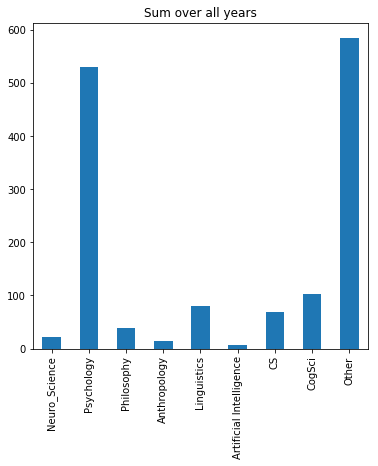

In [27]:
#pd_concat[['year'] + columns]

# plot hexagon normalized by total (0:-2 indexing to exclude columns missing and total)
hex_normed = pd_concat[columns[:-2]].div(pd_concat['Total'], axis='rows')
hex_normed.sum().plot(kind='bar', figsize=(6,6))
plt.xticks(rotation=90)
plt.title('Sum over all years')

In [31]:
hex_normed.groupby(pd_concat['year']).size()

year
1977.0     15
1978.0     18
1979.0     17
1980.0     20
1981.0     17
1982.0     14
1983.0     15
1984.0     19
1985.0     25
1986.0     22
1987.0     26
1988.0     26
1989.0     27
1990.0     26
1991.0     21
1992.0     25
1993.0     29
1994.0     22
1995.0     20
1996.0     18
1997.0     16
1998.0     19
1999.0     23
2000.0     22
2001.0     30
2002.0     37
2003.0     53
2004.0     56
2005.0     43
2006.0     47
2007.0     43
2008.0     59
2009.0     67
2010.0     74
2011.0     58
2012.0     71
2013.0     63
2014.0     74
2015.0     90
2016.0     94
2017.0    168
2018.0     15
dtype: int64

Text(0.5,1,'Hexagon normed, and proportion per year')

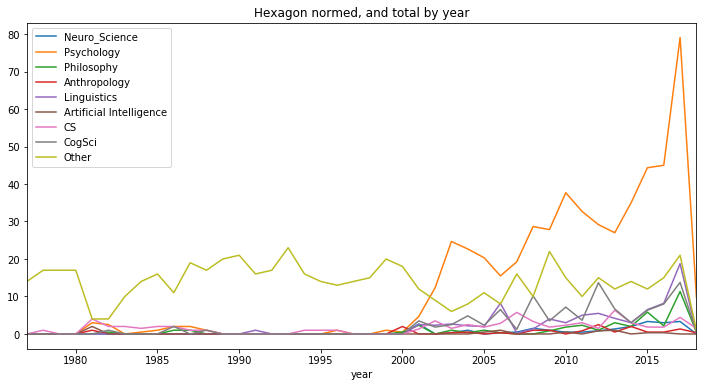

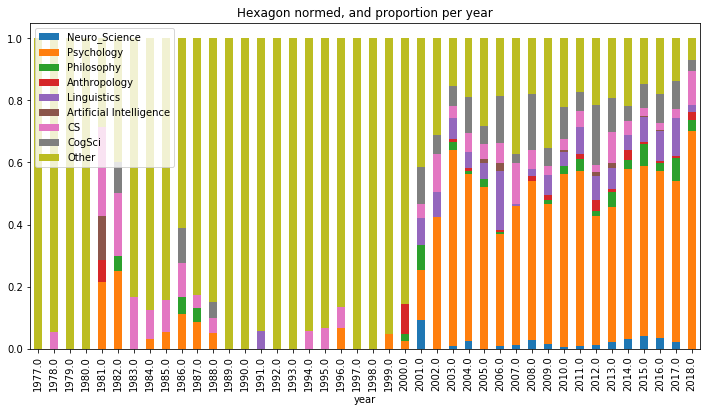

In [33]:
# this plots sum per year, which means it sums to the total # of articles written that year
hex_normed.groupby(pd_concat['year']).sum().plot(figsize=(12,6))
plt.title('Hexagon normed, and total by year')

# this plots mean per year, which means it normalizes by the number of articles written per year
#hex_normed.groupby(pd_concat['year']).mean().plot(figsize=(12,6))
hex_normed.groupby(pd_concat['year']).mean().plot(kind='bar', stacked=True, figsize=(12,6))
#plt.yscale('log')
plt.title('Hexagon normed, and proportion per year')

# pd.groupby is a function that collects rows based on some criteria, in this case, the year of the article
# you guys can figure out how to groupby decades or per 5 years